In [1]:
import gensim
import numpy as np
import os
import sys

ROOT = os.path.dirname(os.getcwd())
path_data = 'C:\\Users\\Gosia\\Desktop\\'
sys.path.insert(0, ROOT)

In [2]:
import passatuto_parser as pp
from matchms.importing.load_from_json import as_spectrum

sys.path.append('C:\\Users\\Gosia\\Desktop\\FDR-Metabolomics\\src\\passatuto_parser.py')

pre_spectrums_query = pp.PassatutoParser(r'C:\\Users\\Gosia\\Desktop\\MassbankOrbi').parse_folder()
pre_spectrums_lib = pp.PassatutoParser('C:\\Users\\Gosia\\Desktop\\Gnps').parse_folder()

# Using MatchMS to create spectra for both
spectrums_query = []
for i, s in enumerate( pre_spectrums_query ):
    spectrums_query.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        
spectrums_lib = []
for i, s in enumerate( pre_spectrums_lib ):
    spectrums_lib.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d' % i)
        

processed 100 files
processed 200 files
processed 300 files
processed 400 files
Finished parsing of 457 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
Finished parsing of 4077 spectra 
processed 100
processe

In [3]:
from matchms.filtering import normalize_intensities
# Spec2Vec trained model requires normalizing
spectrums_query = [normalize_intensities(s) for s in spectrums_query]
spectrums_lib = [normalize_intensities(s) for s in spectrums_lib]


Load pretrained spec2vec model

In [4]:
path_models = os.path.join(path_data, "trained_models_1")
model_file = os.path.join(path_models, "spec2vec_size_170.model")

model = gensim.models.Word2Vec.load(model_file)
print(model_file)

C:\Users\Gosia\Desktop\trained_models_1\spec2vec_size_170.model


Create spectrum "documents"

In [5]:
from spec2vec import Spec2Vec
from spec2vec import SpectrumDocument

documents_query = [SpectrumDocument(s, n_decimals=2) for s in spectrums_query]
documents_lib = [SpectrumDocument(s, n_decimals=2) for s in spectrums_lib]

[<spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021E950E0EE0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021EA335E610>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021EA335E850>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021EA3344D00>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021EA3344970>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021E950E0F70>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021E950E0FD0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021E950E0C70>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021EFBA0B7C0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021EFBA0B5B0>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021EFBA0B670>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021EFBA0B730>, <spec2vec.SpectrumDocument.SpectrumDocument object at 0x0000021EFBA0B5E0>, <spec2vec.SpectrumDocume


Derive embeddings

In [6]:
from tqdm.notebook import tqdm  # optional, just to get a progress bar
from spec2vec.vector_operations import calc_vector


intensity_weighting_power = 0.5
allowed_missing_percentage = 70 # specify the maximum (weighted) fraction of the spectrum that is allowed to be missing

vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_query = np.zeros((len(documents_query), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_query)):
    embeddings_spec2vec_query[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_lib = np.zeros((len(documents_lib), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_lib)):
    embeddings_spec2vec_lib[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 170


Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.32%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.



Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.35%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.33%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 1 word(s) missing in the model.

Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.42%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.23%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 1 word(s) missing in the model.

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.55%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.44%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.16%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.80%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.44%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.09%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.45%.
Found 46 word(s) missing in the model

Found 75 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.79%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.60%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.46%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.86%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.51%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.79%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.04%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.42%.
Found 60 word(s) missing in 

Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.16%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.12%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.56%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.04%.
Found 170 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.17%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.52%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.39%.
Found 98 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.52%.
Found 1 word(s) missing 

Found 1482 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.51%.
Found 322 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.87%.
Found 1391 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.23%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.26%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.13%.
Found 282 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.63%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.20%.
Found 550 word(s)

Found 806 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.
Found 600 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.18%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.55%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.94%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.45%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.35%.
Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.71%.
Found 10 word(s) missing i

Found 290 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.35%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.63%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.17%.
Found 397 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.03%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.35%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.78%.
Found 130 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.22%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.84%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.94%.
Found 41 word(s) missi

Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.53%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.98%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.43%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.09%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.51%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.93%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.23%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.83%.
Found 59 word(s) missing in t

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.63%.
Found 166 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.37%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.04%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.86%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.19%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.30%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.09%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.18%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.55%.
Found 6 word(s) missing i

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.50%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.58%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.30%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.28%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.35%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.28%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.76%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.95%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 17 word(s) missing in the m

Found 652 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.31%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.89%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.48%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.81%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.53%.
Found 126 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.16%.
Found 165 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.72%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.59%.
Found 647 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.83%.
Found 18 word(s) m

Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.17%.
Found 117 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.33%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.44%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.57%.
Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.81%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.06%.
Found 512 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.22%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.71%.
Found 55 word(s) miss

Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.32%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.67%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.45%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.26%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.53%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.81%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.55%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.48%.
Found 13 word(s) missing in t

Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.72%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.70%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.70%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.04%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.70%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.38%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.70%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.34%.
Found 102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.46%.
Found 2 word(s) missing 

Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.59%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.49%.
Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.12%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.74%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.77%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 178 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.88%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.25%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.57%.
Found 446 word(s) missing

Found 643 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.34%.
Found 2802 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.39%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.00%.
Found 541 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.68%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 270 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.78%.
Found 1317 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.25%.
Found 784 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.94%.
Found 509 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.29%.
Found 108 wor

Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.99%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.06%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.52%.
Found 127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.14%.
Found 67 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.21%.
Found 174 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.90%.
Found 1423 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.16%.
Found 151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 303 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.29%.
Found 577 word(

Found 500 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.04%.
Found 314 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.87%.
Found 93 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.53%.
Found 106 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.55%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.74%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.09%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.36%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.10%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.25%.
Found 332 word(s) 

Found 1791 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.82%.
Found 230 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.67%.
Found 70 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.78%.
Found 992 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.24%.
Found 417 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.55%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.21%.
Found 229 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.00%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.46%.
Found 114 word

Found 909 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.80%.
Found 206 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.00%.
Found 1017 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.31%.
Found 237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.41%.
Found 900 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.94%.
Found 382 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.61%.
Found 440 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.94%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.93%.
Found 516 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.10%.
Found 190 wor

Found 879 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.39%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.57%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.88%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 533 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.12%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.00%.
Found 193 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.25%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.31%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.06%.
Found 318 word(s) mis

Found 1024 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.54%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.01%.
Found 383 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.10%.
Found 213 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.86%.
Found 181 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.53%.
Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.73%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.61%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.15%.
Found 136 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.97%.
Found 311 word(

Found 493 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.94%.
Found 334 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 169 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.05%.
Found 111 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 3214 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.82%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.92%.
Found 508 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.83%.
Found 180 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.31%.
Found 263 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.47%.
Found 196 wo

Found 746 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.96%.
Found 90 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.15%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.92%.
Found 564 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.53%.
Found 150 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.50%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 67 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.46%.
Found 312 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.68%.
Found 309 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.90%.
Found 195 word(s

Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.34%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.31%.
Found 312 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.15%.
Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.75%.
Found 331 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.31%.
Found 410 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.42%.
Found 1172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.57%.
Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.01%.
Found 25 wo

Found 122 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.35%.
Found 958 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.38%.
Found 343 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.46%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.04%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.75%.
Found 162 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.86%.
Found 976 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.07%.
Found 743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.42%.
Found 504 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.29%.
Found 245 word

Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.01%.
Found 172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.89%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.58%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.63%.
Found 507 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.70%.
Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.33%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.55%.
Found 126 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.41%.
Found 920 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.23%.
Found 218 word(s) 

Found 475 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 605 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.69%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.14%.
Found 685 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.15%.
Found 306 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.15%.
Found 103 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.19%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 322 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 153 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.85%.
Found 454 wor

Found 169 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.96%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.99%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.99%.
Found 1774 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 674 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.81%.
Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.38%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.27%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.43%.
Found 309 wor

Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.90%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.57%.
Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.52%.
Found 459 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.48%.
Found 359 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.61%.
Found 516 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.75%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.74%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.06%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.75%.
Found 169 word(s) mi

Found 716 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.87%.
Found 158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.92%.
Found 326 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.78%.
Found 240 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.21%.
Found 109 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.56%.
Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.62%.
Found 562 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.91%.
Found 161 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.57%.
Found 256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.70%.
Found 160 word

Found 603 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.88%.
Found 375 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.37%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.66%.
Found 4987 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.15%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.51%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.91%.
Found 263 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.47%.
Found 678 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.18%.
Found 645 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.70%.
Found 363 wo

Found 2146 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.40%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.20%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.97%.
Found 456 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.34%.
Found 199 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.59%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.36%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.15%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.08%.
Found 1207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.59%.
Found 219 word(s

Found 670 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.68%.
Found 365 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.73%.
Found 718 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.13%.
Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.27%.
Found 249 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.19%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.34%.
Found 164 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.74%.
Found 748 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.86%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.69%.
Found 40 word

Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 395 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.66%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.16%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.51%.
Found 258 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.27%.
Found 312 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 284 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.19%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.41%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.87%.
Found 617 word(s) 

Found 358 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.07%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.97%.
Found 2575 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.65%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.03%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.31%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.83%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.83%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.55%.
Found 681 word(s)

Found 1238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.78%.
Found 1080 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.86%.
Found 861 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.59%.
Found 593 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.26%.
Found 98 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 361 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.07%.
Found 67 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.38%.
Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.84%.
Found 58 wor

Found 584 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.63%.
Found 1682 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.10%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.17%.
Found 1991 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.10%.
Found 1003 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.52%.
Found 385 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.44%.
Found 471 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.90%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.97%.
Found 384 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.63%.
Found 47 wor

Found 2332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.16%.
Found 1628 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.79%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.89%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.77%.
Found 564 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.03%.
Found 1272 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.12%.
Found 1682 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.82%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.36%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.29%.
Found 61 

Found 1281 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.79%.
Found 1006 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.54%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.23%.
Found 699 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.43%.
Found 452 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.37%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.60%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.45%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.65%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.55%.
Found 583 word

Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.67%.
Found 933 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 656 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.15%.
Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.90%.
Found 377 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.23%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.37%.
Found 319 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.04%.
Found 681 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 366 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.49%.
Found 1502 word

Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.63%.
Found 3872 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.64%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.35%.
Found 5370 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.91%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.88%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.75%.
Found 271 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.36%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.50%.
Found 1360 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.32%.
Found 1820 

Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.28%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.88%.
Found 416 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.89%.
Found 1463 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.31%.
Found 838 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.29%.
Found 654 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.16%.
Found 106 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.45%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.42%.
Found 832 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.26%.
Found 68 word(

Found 1187 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.98%.
Found 1582 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.18%.
Found 434 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.23%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.48%.
Found 548 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.45%.
Found 3295 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.48%.
Found 106 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.86%.
Found 566 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.50%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.53%.
Found 294 w

Found 1601 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.39%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.60%.
Found 77 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 248 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.35%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.43%.
Found 151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.12%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.17%.
Found 192 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.94%.
Found 1890 word(s) 

Found 772 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.23%.
Found 238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.68%.
Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.03%.
Found 1127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.79%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.15%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.19%.
Found 393 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.67%.
Found 244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.11%.
Found 653 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.24%.
Found 99 word

In [8]:
from cosine_calc import get_hits

hits = get_hits( documents_query, documents_lib, spec2vec_model=model,
                                                        intensity_weighting_power=0.5,
                                                        allowed_missing_percentage=70, passatutto=True)

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.32%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.38%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.70%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.04%.
Found 110 word(s) missing

Found 1247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.09%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.44%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.99%.
Found 195 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.72%.
Found 127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.56%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.28%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.24%.
Found 1172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.57%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.19%.
Found 105 wor

Found 1310 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.65%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.22%.
Found 172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.09%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.44%.
Found 917 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.19%.
Found 346 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.35%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.43%.
Found 40 word(s) 

Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.08%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.23%.
Found 1423 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.16%.
Found 2549 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.80%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.67%.
Found 258 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.27%.
Found 378 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.22%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.14%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.05%.
Found 244 word(s

Found 237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.22%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.01%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.91%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.75%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.12%.
Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.27%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.00%.
Found 170 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.88%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.55%.
Found 364 word(s) m

Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.56%.
Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.15%.
Found 473 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.43%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.63%.
Found 336 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.46%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.74%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.29%.
Found 80 word(s) missin

Found 637 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.39%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.49%.
Found 261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.83%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.18%.
Found 249 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.19%.
Found 219 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.95%.
Found 316 word(s) missing in the model. Weighted missing percentage not covered by the given model is 51.00%.
Found 254 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.84%.
Found 273 wo

Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.54%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.19%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.52%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.68%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.31%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.58%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.75%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.86%.
Found 150 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.72%.
Found 49 word(s) m

Found 1592 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.38%.
Found 747 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.66%.
Found 178 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.88%.
Found 573 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.14%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.64%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.33%.
Found 431 word(s) 

Found 746 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.64%.
Found 318 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.71%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.77%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.42%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.20%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.62%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.41%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.59%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.57%.
Found 65 word(s) mi

Found 2585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.12%.
Found 729 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.63%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.72%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.01%.
Found 2809 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.55%.
Found 3582 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.69%.
Found 1606 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.16%.
Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.48%.
Found 100 

Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.46%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.13%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.48%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.48%.
Found 853 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.33%.
Found 159 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.61%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.36%.
Found 274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.12%.
Found 193 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.06%.
Found 248 word(s) 

Found 994 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.39%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.38%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.76%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.54%.
Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 715 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.84%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.65%.
Found 14 word(s) mis

Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.09%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.53%.
Found 978 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.31%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.86%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.21%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.34%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.76%.
Found 63 word(s) missing

Found 276 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.03%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.62%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.60%.
Found 428 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.05%.
Found 168 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.76%.
Found 469 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.68%.
Found 676 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.05%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.55%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.37%.
Found 15 word

Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.73%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.29%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.91%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.57%.
Found 583 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.53%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.67%.
Found 2348 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 2227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.82%.
Found 1017 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.10%.
Found 13 wo

Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.60%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.37%.
Found 432 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.51%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.33%.
Found 444 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.62%.
Found 869 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.
Found 484 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.64%.
Found 7 word(s) missin

Found 2166 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.87%.
Found 2114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.12%.
Found 789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.14%.
Found 1778 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.15%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.59%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.51%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.57%.
Found 41 word

Found 737 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.20%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.04%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.56%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.82%.
Found 167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.23%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.60%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.47%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.75%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.63%.
Found 505 word(s) mi

Found 1465 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.30%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.16%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.41%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.09%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 600 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.90%.
Found 313 word(s) mis

Found 1906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 1511 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.01%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.92%.
Found 114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.54%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.30%.
Found 1110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.13%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.59%.
Found 998 wor

Found 909 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.80%.
Found 678 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.85%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.72%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.46%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 144 word(s) miss

Found 2151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.94%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.62%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.57%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.06%.
Found 503 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.67%.
Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.10%.
Found 281 word(s

Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.70%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.22%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.53%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.36%.
Found 72 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.60%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.72%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.89%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.63%.
Found 135 word(s) mi

Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.66%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.43%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 836 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.78%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.20%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.04%.
Found 280 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.42%.
Found 75 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.79%.
Found 225 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.19%.
Found 22 word(s) missi

Found 356 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.74%.
Found 195 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.32%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.53%.
Found 462 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.67%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.67%.
Found 394 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.48%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.17%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.36%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.37%.
Found 97 word(s) 

Found 559 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.13%.
Found 181 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.41%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.99%.
Found 434 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.91%.
Found 157 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.55%.
Found 164 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.74%.
Found 140 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.73%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.08%.
Found 120 word(s) m

Found 2214 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.84%.
Found 1608 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.29%.
Found 357 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.47%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.66%.
Found 653 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.37%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.97%.
Found 338 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.26%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.88%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.46%.
Found 2 word(s)

Found 153 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.15%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.17%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.46%.
Found 223 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.29%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.17%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.42%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.17%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.94%.
Found 239 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 334 word(s) miss

Found 1069 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.02%.
Found 770 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.90%.
Found 1593 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.37%.
Found 684 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.76%.
Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.34%.
Found 183 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.94%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.89%.
Found 1445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.05%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.28%.
Found 61 word

Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.98%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.27%.
Found 162 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.24%.
Found 180 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.21%.
Found 2624 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.11%.
Found 893 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.14%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.09%.
Found 905 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.82%.
Found 705 word(s)

Found 230 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.67%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.77%.
Found 534 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.87%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.04%.
Found 430 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.69%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.13%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.11%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.07%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.78%.
Found 4437 word

Found 1112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.48%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.74%.
Found 1092 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.65%.
Found 205 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.28%.
Found 418 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.63%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 233 word(s)

Found 1558 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.83%.
Found 3134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 1224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.72%.
Found 1417 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.61%.
Found 1419 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.20%.
Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.38%.
Found 565 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 382 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.61%.
Found 795 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.24%.
Found

Found 2604 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.51%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.48%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.14%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.54%.
Found 2474 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 470 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.93%.
Found 228 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.07%.
Found 489 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.96%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.26%.
Found 64 word(s) m

Found 739 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.92%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.28%.
Found 2802 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.39%.
Found 2244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.27%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.59%.
Found 708 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.79%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 1140 word(

Found 2187 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.41%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.84%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 955 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.54%.
Found 435 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.90%.
Found 615 word(s) missin

Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.84%.
Found 450 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.06%.
Found 306 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.41%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.
Found 707 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.94%.
Found 567 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.86%.
Found 2112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.93%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.31%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.04%.
Found 188 word(

Found 1759 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.14%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.65%.
Found 337 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.19%.
Found 475 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.83%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.06%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.39%.
Found 559 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.23%.
Found 275 word

Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.31%.
Found 1092 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.32%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.44%.
Found 220 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.86%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.93%.
Found 445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 326 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.60%.
Found 263 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.47%.
Found 989 word(

Found 1342 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.11%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.02%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.79%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.51%.
Found 198 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.26%.
Found 563 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.94%.
Found 1791 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.82%.
Found 1308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.65%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.68%.
Found 127 word(s

Found 1327 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.34%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.70%.
Found 250 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.77%.
Found 457 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.60%.
Found 900 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.58%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.52%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.18%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.51%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 251 word(s)

Found 4987 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.15%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.90%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.61%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.60%.
Found 6 word(s) missing i

Found 157 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.24%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.26%.
Found 78 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.63%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.63%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.03%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.75%.
Found 96 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.79%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.19%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.61%.
Found 123 word(s) missi

Found 537 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.13%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.04%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.60%.
Found 493 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.94%.
Found 610 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.97%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.80%.
Found 115 word(s) missing

Found 963 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.73%.
Found 104 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.80%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.16%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.89%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.37%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.76%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.83%.
Found 156 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.14%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.84%.
Found 90 word(s) m

Found 589 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.37%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.81%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.07%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.92%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.99%.
Found 2927 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.67%.
Found 603 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.88%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.96%.
Found 7 word(s) missi

361

In [12]:
# Loading the decoy database
pre_spectrums_decoys_cond = pp.DecoyParserPassatuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyConditionalPeaks').parse_folder()
pre_spectrums_decoys_rand = pp.DecoyParserPassatuto(r'C:\\Users\\Gosia\\Desktop\\GnpsDecoyRandomPeaks').parse_folder()

processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 files
processed 800 files
processed 900 files
processed 1000 files
processed 1100 files
processed 1200 files
processed 1300 files
processed 1400 files
processed 1500 files
processed 1600 files
processed 1700 files
processed 1800 files
processed 1900 files
processed 2000 files
processed 2100 files
processed 2200 files
processed 2300 files
processed 2400 files
processed 2500 files
processed 2600 files
processed 2700 files
processed 2800 files
processed 2900 files
processed 3000 files
processed 3100 files
processed 3200 files
processed 3300 files
processed 3400 files
processed 3500 files
processed 3600 files
processed 3700 files
processed 3800 files
processed 3900 files
processed 4000 files
Finished parsing of 4095 spectra 
processed 100 files
processed 200 files
processed 300 files
processed 400 files
processed 500 files
processed 600 files
processed 700 f

In [13]:
# Using MatchMS to create decoy spectra
decoys_cond = []
for i, s in enumerate( pre_spectrums_decoys_cond ):
    decoys_cond.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)

decoys_rand = []
for i, s in enumerate( pre_spectrums_decoys_rand ):
    decoys_rand.append(as_spectrum(s))
    if i and i % 100 == 0:
        print('processed %d'% i)

processed 100
processed 200
processed 300
processed 400
processed 500
processed 600
processed 700
processed 800
processed 900
processed 1000
processed 1100
processed 1200
processed 1300
processed 1400
processed 1500
processed 1600
processed 1700
processed 1800
processed 1900
processed 2000
processed 2100
processed 2200
processed 2300
processed 2400
processed 2500
processed 2600
processed 2700
processed 2800
processed 2900
processed 3000
processed 3100
processed 3200
processed 3300
processed 3400
processed 3500
processed 3600
processed 3700
processed 3800
processed 3900
processed 4000
processed 100
processed 200
processed 300
processed 400
processed 500
processed 600
processed 700
processed 800
processed 900
processed 1000
processed 1100
processed 1200
processed 1300
processed 1400
processed 1500
processed 1600
processed 1700
processed 1800
processed 1900
processed 2000
processed 2100
processed 2200
processed 2300
processed 2400
processed 2500
processed 2600
processed 2700
processed 280

In [14]:
from matchms.filtering import normalize_intensities

decoys_cond = [normalize_intensities(s) for s in decoys_cond]
decoys_rand = [normalize_intensities(s) for s in decoys_rand]

In [19]:
documents_decoys_cond = [SpectrumDocument(s, n_decimals=2) for s in decoys_cond]
documents_decoys_rand = [SpectrumDocument(s, n_decimals=2) for s in decoys_rand]

In [22]:
vector_size = model.vector_size
print(f"Embedding vector size: {vector_size}")

embeddings_spec2vec_decoys_cond = np.zeros((len(documents_decoys_cond), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys_cond)):
    embeddings_spec2vec_decoys_cond[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)
embeddings_spec2vec_decoys_rand = np.zeros((len(documents_decoys_rand), vector_size), dtype="float")
for i, doc in enumerate(tqdm(documents_decoys_rand)):
    embeddings_spec2vec_decoys_rand[i, 0:vector_size] = calc_vector(model, doc,
                                                        intensity_weighting_power,
                                                        allowed_missing_percentage)

Embedding vector size: 170


In [23]:
def add_pmz(specs):
    from rdkit.Chem import MolFromSmiles, MolToSmiles, MolFromInchi
    from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcMolFormula
    for s in specs:
        s._obj.set('precursor_mz', s._obj.get('parent_mass', 0))
        
add_pmz(documents_query)

In [25]:
import copy
documents_decoys_cond = []
for v,d in zip(embeddings_spec2vec_decoys_cond,documents_lib):
    decoy_doc = copy.deepcopy(d)
    decoy_doc._obj.set('inchi', 'knockoff')
    decoy_doc._obj.set('inchikey_inchi', 'knockoff')
    decoy_doc._obj.set('vector', v)
    documents_decoys_cond.append(decoy_doc)

hits_decoys_cond = get_hits(documents_query, documents_decoys_cond, decoys=True, spec2vec_model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True)


documents_decoys_rand = []
for v,d in zip(embeddings_spec2vec_decoys_rand,documents_lib):
    decoy_doc = copy.deepcopy(d)
    decoy_doc._obj.set('inchi', 'knockoff')
    decoy_doc._obj.set('inchikey_inchi', 'knockoff')
    decoy_doc._obj.set('vector', v)
    documents_decoys_rand.append(decoy_doc)

hits_decoys_rand = get_hits(documents_query, documents_decoys_rand, decoys=True, spec2vec_model=model, precursor_tol=3, metaKey="precursor_mz",
                                                        intensity_weighting_power=intensity_weighting_power,
                                                        allowed_missing_percentage=allowed_missing_percentage, passatutto=True)

Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.32%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.24%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 53.56%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.38%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.70%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.04%.
Found 110 word(s) missing

Found 1247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.09%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.44%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.99%.
Found 195 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.72%.
Found 127 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.56%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.28%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.24%.
Found 1172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.57%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.19%.
Found 105 wor

Found 1310 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.65%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.22%.
Found 172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.09%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.44%.
Found 917 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.19%.
Found 346 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.35%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.43%.
Found 40 word(s) 

Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.87%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.95%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.12%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.45%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.78%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.08%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.23%.
Found 244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.99%.
Found 1423 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.16%.
Found 2549 word

Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.20%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.50%.
Found 434 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.23%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.55%.
Found 93 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.63%.
Found 79 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.05%.
Found 393 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.27%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.64%.
Found 101 word(s) m

Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.71%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 211 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.20%.
Found 228 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.27%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.05%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.66%.
Found 576 word(s) missing in the model. Weighted missing percentage not covered by the given model is 60.18%.
Found 544 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.80%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.99%.
Found 98 word(s) miss

Found 155 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.81%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.40%.
Found 192 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.94%.
Found 111 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.26%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.91%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.27%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.65%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.36%.
Found 1252 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.31%.
Found 267 wo

Found 1098 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.75%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.54%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.19%.
Found 681 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 1108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.85%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.52%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.68%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.31%.
Found 42 word(s

Found 1592 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.38%.
Found 747 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.66%.
Found 573 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.14%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.64%.
Found 431 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.33%.
Found 22 word(s) mi

Found 414 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.36%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.84%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.29%.
Found 746 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.64%.
Found 318 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.71%.
Found 296 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.06%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.77%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.42%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.20%.
Found 65 word(s) 

Found 413 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.26%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.72%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.01%.
Found 367 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.00%.
Found 729 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.63%.
Found 2585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.12%.
Found 2809 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.55%.
Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.48%.
Found 100 wo

Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.31%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.08%.
Found 355 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.35%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.27%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.46%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.77%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.03%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.46%.
Found 289 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.13%.
Found 6 word(s) mis

Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.96%.
Found 368 word(s) missing in the model. Weighted missing percentage not covered by the given model is 39.04%.
Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.52%.
Found 994 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.39%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.38%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.76%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.54%.
Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 256 word(s)

Found 1350 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.11%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.15%.
Found 718 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.13%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.09%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.53%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.86%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.21%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.
Found 7 word(s) mi

Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.60%.
Found 428 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.05%.
Found 676 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.05%.
Found 469 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.68%.
Found 168 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.76%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.55%.
Found 594 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.42%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.47%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.37%.
Found 15 word

Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.73%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.29%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.91%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.67%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.57%.
Found 583 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.53%.
Found 2227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.82%.
Found 2348 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.60%.
Found 1017 wor

Found 578 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.68%.
Found 432 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.51%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.37%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.33%.
Found 444 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.62%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.
Found 136 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.00%.
Found 484 word(s) miss

Found 2166 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.87%.
Found 2114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.12%.
Found 789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.14%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 1778 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.15%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.59%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.51%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.57%.
Found 41 word

Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.04%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.56%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.82%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.60%.
Found 167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.23%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.47%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.63%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.62%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.00%.
Found 97 word(s) miss

Found 1465 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.30%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.16%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.41%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.09%.
Found 600 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.90%.
Found 313 word(s) mis

Found 1906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.92%.
Found 1511 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.01%.
Found 114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.54%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.30%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.59%.
Found 998 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.18%.
Found 933 word

Found 909 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.80%.
Found 678 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.85%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.72%.
Found 1825 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.51%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 144 word(s) mis

Found 1034 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.30%.
Found 149 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.51%.
Found 2151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.94%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.62%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.57%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.06%.
Found 503 word(s

Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.91%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.70%.
Found 238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.17%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.52%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.49%.
Found 1272 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.88%.
Found 696 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.56%.
Found 2192 word(s) m

Found 609 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.75%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 1000 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.00%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.99%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.40%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.65%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.13%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.
Found 884 word(s) missin

Found 455 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.30%.
Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.22%.
Found 258 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1528 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.22%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.63%.
Found 102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.45%.
Found 118 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.54%.
Found 240 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.21%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.58%.
Found 239 word(s

Found 265 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.51%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.80%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.91%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.14%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.94%.
Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.32%.
Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.25%.
Found 1246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.95%.
Found 283 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.28%.
Found 92 word(s

Found 830 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.58%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.95%.
Found 261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.74%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.14%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.60%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.46%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.01%.
Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.63%.
Found 1182 word(s) missi

Found 239 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 334 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.66%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.98%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.28%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.00%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.37%.
Found 577 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.41%.
Found 743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.42%.
Found 277 word(s) missin

Found 183 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.94%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.89%.
Found 1445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.05%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.28%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.80%.
Found 579 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.97%.
Found 500 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.99%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.93%.
Found 2789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.12%.
Found 83 word(s)

Found 2624 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.11%.
Found 893 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.14%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.09%.
Found 905 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.82%.
Found 705 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.01%.
Found 748 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.86%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.78%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.98%.
Found 113 word

Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.77%.
Found 534 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.87%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.04%.
Found 430 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.69%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.13%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.11%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.07%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.78%.
Found 4437 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.79%.
Found 201 word

Found 1112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.48%.
Found 1092 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.65%.
Found 205 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.88%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.28%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.74%.
Found 418 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.63%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 95 word(s

Found 1558 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.83%.
Found 3134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 1224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.72%.
Found 1417 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.61%.
Found 1419 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.20%.
Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.38%.
Found 565 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 382 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.61%.
Found 795 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.24%.
Found

Found 2604 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.51%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.14%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.54%.
Found 2474 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 470 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.93%.
Found 228 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.07%.
Found 489 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.96%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.51%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.26%.
Found 675 word(s) 

Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.92%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.61%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.28%.
Found 2802 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.39%.
Found 2244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.27%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.59%.
Found 708 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.79%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 1140 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.52%.
Found 10 word(s)

Found 955 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.54%.
Found 435 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.90%.
Found 615 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.67%.
Found 1309 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.80%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.74%.
Found 391 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.53%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.60%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.36%.
Found 656 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.15%.
Found 112 wor

Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.62%.
Found 1388 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.69%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.52%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.51%.
Found 502 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.81%.
Found 566 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.50%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 647 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.97%.
Found 3274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.12%.
Found 29 word(s

Found 3029 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.28%.
Found 1066 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.31%.
Found 925 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 2320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.74%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.85%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.
Found 1682 word(s) 

Found 989 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.32%.
Found 524 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.83%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.05%.
Found 780 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.61%.
Found 539 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.12%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.
Found 1276 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.73%.
Found 380 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.38%.
Found 281 word(

Found 467 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.60%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.23%.
Found 3295 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.48%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.28%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.61%.
Found 494 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.78%.
Found 302 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.48%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.67%.
Found 404 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.44%.
Found 259 wo

Found 1455 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.67%.
Found 195 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.56%.
Found 204 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.70%.
Found 181 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.53%.
Found 318 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.75%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.54%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.59%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.69%.
Found 577 word(s) mis

Found 369 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.92%.
Found 470 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.88%.
Found 170 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.65%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.28%.
Found 312 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 70 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.78%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.13%.
Found 153 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.41%.
Found 24 word(s) missi

Found 619 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.50%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.57%.
Found 163 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.95%.
Found 193 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.73%.
Found 434 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.44%.
Found 151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.40%.
Found 225 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.97%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.87%.
Found 272 word(s) mi

Found 174 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.27%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.91%.
Found 485 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.37%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.80%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.19%.
Found 533 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.12%.
Found 122 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.29%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.99%.
Found 757 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.89%.
Found 50 word(s) missin

Found 868 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 639 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.98%.
Found 238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.68%.
Found 175 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.01%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.05%.
Found 13 word(s) missing i

Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.71%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.21%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.09%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.23%.
Found 1890 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.68%.
Found 649 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.87%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.74%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.35%.
Found 60 word(s) missing in

Found 489 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.02%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.50%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.56%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.87%.
Found 205 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.97%.
Found 435 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.54%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.19%.
Found 618 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.33%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.86%.
Found 11 word(s) m

Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.40%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.46%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.39%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.23%.
Found 395 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.89%.
Found 440 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.70%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.36%.
Found 384 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.63%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.49%.
Found 69 word(s

Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.36%.
Found 452 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.37%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.52%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.97%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.64%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.47%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.04%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.
Found 147 word(s) miss

Found 581 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.78%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.99%.
Found 916 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.21%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.44%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.02%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.21%.
Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.36%.
Found 500 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.19%.
Found 173 word(s

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.50%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.86%.
Found 1209 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.10%.
Found 353 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.87%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 385 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.20%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.88%.
Found 365 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.73%.
Found 173 word(s

Found 1952 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.87%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.66%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.48%.
Found 78 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.35%.
Found 72 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.68%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.46%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.02%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.23%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.67%.
Found 5 word(s) mis

Found 98 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.33%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.44%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.02%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.53%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.67%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 234 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.04%.
Found 254 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.31%.
Found 48 word(s) missing

Found 1125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.04%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.15%.
Found 543 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.50%.
Found 1330 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.94%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.00%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.15%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.06%.
Found 77 word(s)

Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.70%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.99%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.88%.
Found 222 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.36%.
Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.91%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.01%.
Found 159 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.33%.
Found 223 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 183 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 150 word(

Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.09%.
Found 593 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.30%.
Found 109 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.72%.
Found 1582 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.18%.
Found 231 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.89%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.64%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.17%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.45%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.54%.
Found 6 word(s)

Found 477 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.98%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.49%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.22%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.19%.
Found 1502 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.43%.
Found 174 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.02%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.31%.
Found 883 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.37%.
Found 251 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.96%.
Found 230 word(s

Found 766 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.55%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.59%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.01%.
Found 118 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.13%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.37%.
Found 392 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.40%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.03%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.64%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 1 word(s) mis

Found 129 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.16%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.27%.
Found 72 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.70%.
Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.22%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.31%.
Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.95%.
Found 363 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.40%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.22%.
Found 1188 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.47%.
Found 82 word(s

Found 559 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.30%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.35%.
Found 155 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.47%.
Found 172 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.10%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.46%.
Found 1991 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.10%.
Found 2001 word(s) missing in the model. Weighted missing percentage not covered by the given model is 49.33%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.31%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.95%.
Found 45 word(s

Found 1102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.21%.
Found 441 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.49%.
Found 140 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.05%.
Found 1031 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.41%.
Found 347 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.72%.
Found 479 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.26%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.87%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 662 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.87%.
Found 24 wor

Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.28%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.90%.
Found 300 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.90%.
Found 110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.95%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.09%.
Found 194 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.32%.
Found 254 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.38%.
Found 278 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.37%.
Found 353 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.14%.
Found 202 word(s)

Found 929 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.05%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.75%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.30%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.61%.
Found 136 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.32%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.00%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.82%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.27%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.16%.
Found 36 word(s) missing

Found 885 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.42%.
Found 863 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.13%.
Found 265 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.26%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.55%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.70%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.34%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 670 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.68%.
Found 1525 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.68%.
Found 1720 word(s)

Found 760 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.16%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.02%.
Found 96 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.04%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.94%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.13%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.54%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 224 word(s) missing in t

Found 925 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.43%.
Found 464 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.33%.
Found 1110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.13%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.10%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.46%.
Found 155 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.61%.
Found 1389 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.04%.
Found 1215 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.37%.
Found 770 

Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.41%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.05%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 232 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.52%.
Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.14%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.61%.
Found 72 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.89%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.92%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.13%.
Found 104 word(s) missi

Found 1837 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.95%.
Found 188 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.15%.
Found 1563 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.28%.
Found 1209 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.57%.
Found 415 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.93%.
Found 1476 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.55%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.56%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.07%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.17%.
Found 91 

Found 1391 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.23%.
Found 337 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.95%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.79%.
Found 163 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.75%.
Found 381 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.58%.
Found 397 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.03%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.55%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 1 word(s) miss

Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.28%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.86%.
Found 593 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.26%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.45%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.99%.
Found 425 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.54%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.07%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.62%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.87%.
Found 6 word(s) missing

Found 565 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.94%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.62%.
Found 331 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.45%.
Found 282 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.63%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.20%.
Found 184 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 161 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.44%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.39%.
Found 4 word(s) miss

Found 2008 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.60%.
Found 690 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.35%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.48%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.53%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.70%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.66%.
Found 205 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.12%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.90%.
Found 236 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.79%.
Found 1996 word(s)

Found 1535 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.10%.
Found 77 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 198 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.34%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.09%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 519 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.08%.
Found 170 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.17%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.06%.
Found 467 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.97%.
Found 357 word(s) m

Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.86%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.
Found 297 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.50%.
Found 553 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.22%.
Found 354 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.47%.
Found 394 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.69%.
Found 158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.57%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.00%.
Found 94 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.26%.
Found 135 word(s

Found 437 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.57%.
Found 324 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.60%.
Found 279 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.64%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.12%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.24%.
Found 1147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.04%.
Found 1123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.68%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.40%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.03%.
Found 40 word(

Found 545 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.54%.
Found 558 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.02%.
Found 1122 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.96%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.45%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.44%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.27%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.56%.
Found 123 word(s) mi

Found 3131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.23%.
Found 346 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.95%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 373 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.03%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.29%.
Found 287 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 311 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.03%.
Found 338 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.04%.
Found 213 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.51%.
Found 87 word

Found 708 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.73%.
Found 516 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.75%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.91%.
Found 3154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.74%.
Found 2446 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.48%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 73 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.81%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.46%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.16%.
Found 262 word(s) m

Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.10%.
Found 214 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.20%.
Found 743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.92%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.74%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.63%.
Found 580 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.67%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.98%.
Found 222 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.43%.
Found 182 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.39%.
Found 252 word(s)

Found 1628 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.79%.
Found 284 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.01%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 600 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.04%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.26%.
Found 287 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.54%.
Found 483 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.90%.
Found 318 word(s) miss

Found 199 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.59%.
Found 440 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.28%.
Found 3251 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.68%.
Found 162 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 538 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.99%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.28%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.31%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.66%.
Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.98%.
Found 372 word(s)

Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.81%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.01%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.35%.
Found 193 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.63%.
Found 389 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.83%.
Found 194 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.74%.
Found 338 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.60%.
Found 174 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.03%.
Found 328 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.46%.
Found 824 word(s)

Found 2099 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.70%.
Found 1017 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.31%.
Found 3072 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.89%.
Found 765 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.12%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.09%.
Found 537 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.48%.
Found 661 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.16%.
Found 278 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.65%.
Found 2196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.06%.
Found 2

Found 1447 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.95%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 388 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.75%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.15%.
Found 575 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.68%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.07%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.23%.
Found 291 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.65%.
Found 838 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.24%.
Found 40 word(s

Found 1494 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.38%.
Found 3654 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.16%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.07%.
Found 151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.12%.
Found 711 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.87%.
Found 642 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.04%.
Found 190 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.03%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.59%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.76%.
Found 194 word(

Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.62%.
Found 182 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.22%.
Found 482 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.76%.
Found 160 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.68%.
Found 749 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.80%.
Found 174 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.61%.
Found 519 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.81%.
Found 363 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.80%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.00%.
Found 151 word(

Found 2636 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.73%.
Found 2637 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.17%.
Found 150 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.50%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.04%.
Found 176 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.52%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.77%.
Found 293 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.38%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.36%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.62%.
Found 38 word(s) m

Found 1005 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.07%.
Found 266 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.24%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.73%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.44%.
Found 145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.73%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.46%.
Found 258 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.42%.
Found 249 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.54%.
Found 410 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.42%.
Found 223 word(s) 

Found 712 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.99%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.84%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.26%.
Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.52%.
Found 57 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.54%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.37%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.84%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.03%.
Found 157 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.24%.
Found 5 word(s) missi

Found 407 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.73%.
Found 750 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.00%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.28%.
Found 597 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.24%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.04%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.29%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.83%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.10%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.08%.
Found 207 word(s) miss

Found 187 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.35%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.98%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.41%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.23%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.18%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 70 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.01%.
Found 121 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.45%.
Found 83 word(s) missing in 

Found 98 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.21%.
Found 408 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.35%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.66%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.84%.
Found 297 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.00%.
Found 2979 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.37%.
Found 3884 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.73%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.90%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.27%.
Found 54 word(s) 

In [26]:
# Calculating true q-value scores
from q_value_calc import calculate_q_value
q_list_true = calculate_q_value(hits)

In [27]:
# Calculating estimated q-value scores
q_list_estimated_cond = calculate_q_value(hits+hits_decoys_cond,True)
q_list_estimated_rand = calculate_q_value(hits+hits_decoys_rand,True)

In [28]:
from knockoffs import generate_knockoffs

diags = [130]
q_list_knockoffs = {}
for diag in diags:
    for comp in [3]:
        try:
            knockoff_documents = generate_knockoffs(model,documents_lib,allowed_missing_percentage=allowed_missing_percentage,n_components=comp, diagonal_matrix=diag)
            hits_knockoffs = get_hits(documents_query, knockoff_documents, decoys=True, spec2vec_model=model, precursor_tol=3, metaKey="precursor_mz",
                                                                    intensity_weighting_power=intensity_weighting_power,
                                                                    allowed_missing_percentage=allowed_missing_percentage, passatutto=True)
            q_list_knockoffs[(diag, comp)] = calculate_q_value(hits+hits_knockoffs,True)
        except Exception as e:
            print( diag, "failed", e )

Embedding vector size: 170
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.64%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.38%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.70%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.04%.
Found 110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.69%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.65%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.44%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.26%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.23%

Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.27%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.35%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.95%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.11%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.86%.
Found 244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.11%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 58.42%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.42%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.02%.
Found 27 word(s) mis

Found 652 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.86%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.97%.
Found 548 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.45%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.42%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.65%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.77%.
Found 103 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.36%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.05%.
Found 42 word(s) missi

Found 2549 word(s) missing in the model. Weighted missing percentage not covered by the given model is 46.80%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.67%.
Found 258 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.27%.
Found 378 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.22%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.14%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.05%.
Found 244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.99%.
Found 311 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.26%.
Found 366 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.49%.
Found 686 word(

Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.27%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.00%.
Found 170 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.88%.
Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.55%.
Found 364 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.00%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.03%.
Found 134 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.19%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.07%.
Found 1089 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.40%.
Found 201 wo

Found 473 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.43%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.98%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.63%.
Found 336 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.46%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.74%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.29%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.88%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.81%.
Found 239 word(s) missi

Found 219 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.95%.
Found 316 word(s) missing in the model. Weighted missing percentage not covered by the given model is 51.00%.
Found 254 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.84%.
Found 273 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.70%.
Found 415 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.03%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.40%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.44%.
Found 91 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.22%.
Found 5 word(s)

Found 1272 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.12%.
Found 330 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.11%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.65%.
Found 160 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.29%.
Found 617 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.96%.
Found 861 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.33%.
Found 762 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.96%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.36%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 4 word(s

Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.67%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.11%.
Found 952 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.83%.
Found 671 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.77%.
Found 242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.60%.
Found 311 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.10%.
Found 997 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.19%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.71%.
Found 274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.74%.
Found 5 word(

Found 1348 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.39%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.56%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.97%.
Found 118 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.82%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.98%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.49%.
Found 873 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.76%.
Found 62 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.25%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.53%.
Found 68 word(s) mi

Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.01%.
Found 1681 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.21%.
Found 1038 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.14%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.96%.
Found 515 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.13%.
Found 446 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.81%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.28%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.43%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.17%.
Found 38 

Found 812 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.97%.
Found 859 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.78%.
Found 2512 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.51%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.07%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.74%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.83%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.03%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.94%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.43%.
Found 31 word(s) m

Found 830 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.77%.
Found 2400 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.35%.
Found 1588 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.73%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 1090 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.71%.
Found 297 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.45%.
Found 191 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.72%.
Found 139 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.89%.
Found 793 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.53%.
Found 754

Found 1698 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.66%.
Found 1274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.06%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.67%.
Found 73 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.57%.
Found 429 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.03%.
Found 320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.25%.
Found 952 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.42%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.25%.
Found 389 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.85%.
Found 516 wo

Found 255 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.51%.
Found 1167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.77%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.52%.
Found 1645 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.11%.
Found 326 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.93%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.49%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.42%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.17%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.94%.
Found 1316 word(

Found 1183 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.50%.
Found 906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.47%.
Found 86 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.03%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.97%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.86%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.59%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.99%.
Found 174 word(s) missin

Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.19%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.06%.
Found 626 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.45%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.59%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.11%.
Found 464 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.93%.
Found 372 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.96%.
Found 1219 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.80%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.83%.
Found 5 word(

Found 601 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.43%.
Found 1601 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.05%.
Found 290 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.05%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.92%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.65%.
Found 1256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.81%.
Found 1720 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.89%.
Found 2065 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.73%.
Found 22

Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.91%.
Found 325 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.47%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.00%.
Found 517 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.17%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.42%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.51%.
Found 203 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.82%.
Found 443 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.39%.
Found 699 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.43%.
Found 1579 word(

Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.69%.
Found 94 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.91%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.35%.
Found 268 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.46%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 106 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.45%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.16%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 2145 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.36%.
Found 108 word(s) m

Found 788 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.44%.
Found 246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.96%.
Found 296 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.35%.
Found 310 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.38%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.65%.
Found 1158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.53%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 927 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.66%.
Found 1080 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.86%.
Found 45 word(

Found 633 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.90%.
Found 606 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.41%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.81%.
Found 51 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.31%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.31%.
Found 104 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.10%.
Found 700 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.82%.
Found 640 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.38%.
Found 39 word(s) mis

Found 422 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.72%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.34%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.91%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.37%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.99%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.48%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.61%.
Found 117 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.20%.
Found 16 word(s) missing

Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.49%.
Found 2192 word(s) missing in the model. Weighted missing percentage not covered by the given model is 30.28%.
Found 549 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.29%.
Found 78 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.66%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.52%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.74%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.54%.
Found 861 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.59%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.03%.
Found 85 word(s) mis

Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.24%.
Found 1000 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.00%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.99%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.40%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.65%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.13%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.
Found 884 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.59%.
Found 761 word(s) missin

Found 455 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.30%.
Found 260 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.22%.
Found 258 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 1528 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.22%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.63%.
Found 102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.45%.
Found 118 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.54%.
Found 240 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.21%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.58%.
Found 239 word(s

Found 1246 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.95%.
Found 92 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.54%.
Found 586 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.32%.
Found 3452 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.77%.
Found 331 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.31%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.14%.
Found 237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.41%.
Found 90 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.88%.
Found 200 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.76%.
Found 97 word

Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.63%.
Found 1182 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.65%.
Found 837 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.69%.
Found 213 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.86%.
Found 253 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.90%.
Found 414 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.39%.
Found 375 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.65%.
Found 153 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.62%.
Found 899 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.46%.
Found 67

Found 743 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.42%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.56%.
Found 247 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.56%.
Found 158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.58%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.74%.
Found 361 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 115 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.14%.
Found 320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.02%.
Found 147 word(s) m

Found 2789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.12%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.54%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.09%.
Found 207 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.94%.
Found 265 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.52%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.73%.
Found 1142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.76%.
Found 502 word(

Found 748 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.86%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.73%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.98%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.78%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.44%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.32%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.63%.
Found 1101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 208 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 354 word(s

Found 4437 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.79%.
Found 201 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.60%.
Found 394 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.33%.
Found 1774 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 1102 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.80%.
Found 2582 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.76%.
Found 257 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.30%.
Found 1237 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.90%.
Found 84 

Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.08%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 233 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.74%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.75%.
Found 95 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.21%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.18%.
Found 423 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.13%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.45%.
Found 564 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.53%.
Found 399 word(s) mis

Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.38%.
Found 565 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 382 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.61%.
Found 795 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.24%.
Found 1938 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.64%.
Found 2360 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.43%.
Found 36 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.64%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.07%.
Found 454 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.88%.
Found 123 wo

Found 675 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.24%.
Found 226 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.41%.
Found 1995 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.81%.
Found 42 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.18%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.53%.
Found 110 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.42%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.25%.
Found 1242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.24%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.40%.
Found 7 word(s)

Found 2244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.27%.
Found 285 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.59%.
Found 708 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.79%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.69%.
Found 1140 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.52%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.55%.
Found 3261 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.53%.
Found 98 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.60%.
Found 493 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.78%.
Found 541 word(

Found 955 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.54%.
Found 435 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.90%.
Found 615 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.67%.
Found 1309 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.80%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.74%.
Found 391 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.53%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.60%.
Found 656 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.15%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.36%.
Found 112 wor

Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.62%.
Found 1388 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.69%.
Found 202 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.52%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.51%.
Found 502 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.81%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 566 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.50%.
Found 3274 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.12%.
Found 647 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.97%.
Found 305 word(

Found 3029 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.28%.
Found 1066 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.31%.
Found 925 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 2320 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.74%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.20%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.85%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.
Found 1682 word(s) 

Found 989 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.73%.
Found 299 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.32%.
Found 524 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.83%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.05%.
Found 780 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.61%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.70%.
Found 1276 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.73%.
Found 539 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.12%.
Found 380 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.38%.
Found 281 word(

Found 154 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.23%.
Found 467 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.60%.
Found 3295 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.48%.
Found 137 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.28%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.61%.
Found 494 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.78%.
Found 302 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.48%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.67%.
Found 404 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.44%.
Found 259 wo

Found 1455 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.67%.
Found 195 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.56%.
Found 204 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.70%.
Found 181 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.53%.
Found 318 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.75%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.54%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.59%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.22%.
Found 38 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.69%.
Found 577 word(s) mis

Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.62%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.83%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.33%.
Found 99 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.55%.
Found 369 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.92%.
Found 470 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.88%.
Found 170 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.65%.
Found 35 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.28%.
Found 312 word(s) missin

Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.99%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.19%.
Found 619 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.50%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.11%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.57%.
Found 163 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.95%.
Found 193 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.73%.
Found 434 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.44%.
Found 151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.40%.
Found 225 word(s) mi

Found 174 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.27%.
Found 152 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.91%.
Found 485 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.37%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.80%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.19%.
Found 533 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.12%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.99%.
Found 122 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.29%.
Found 757 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.89%.
Found 50 word(s) missin

Found 868 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 639 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.98%.
Found 238 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.68%.
Found 175 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.49%.
Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.01%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.17%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.05%.
Found 13 word(s) missing i

Found 852 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.58%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.35%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.71%.
Found 85 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.09%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.21%.
Found 1890 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.68%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.23%.
Found 649 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.07%.
Found 3 word(s) missing 

Found 544 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.50%.
Found 255 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.41%.
Found 461 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.05%.
Found 523 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.70%.
Found 489 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.02%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.50%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.56%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.87%.
Found 205 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.97%.
Found 435 word(s

Found 647 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.94%.
Found 471 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.99%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.59%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.79%.
Found 737 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.84%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.40%.
Found 46 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.46%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.39%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.23%.
Found 395 word(

Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.36%.
Found 452 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.37%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.52%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.97%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.64%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.47%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.04%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.52%.
Found 147 word(s) miss

Found 916 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.21%.
Found 8 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.44%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 267 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.02%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.21%.
Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.36%.
Found 500 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.19%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.92%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.20%.
Found 66 word(s) m

Found 1209 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.10%.
Found 353 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.87%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.98%.
Found 385 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.20%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.88%.
Found 365 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.73%.
Found 173 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.73%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.00%.
Found 2 word(

Found 155 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.81%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.40%.
Found 192 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.94%.
Found 111 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.26%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.91%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.27%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.65%.
Found 83 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.36%.
Found 1252 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.31%.
Found 267 wo

Found 1098 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.75%.
Found 315 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.54%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.19%.
Found 681 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.76%.
Found 19 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.04%.
Found 1108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.85%.
Found 43 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.52%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.68%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.31%.
Found 42 word(s

Found 1592 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.38%.
Found 747 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.66%.
Found 573 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.14%.
Found 141 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.50%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.07%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.19%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.64%.
Found 431 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 506 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.33%.
Found 22 word(s) mi

Found 746 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.64%.
Found 318 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.71%.
Found 296 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.06%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.77%.
Found 147 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.42%.
Found 58 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.20%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.19%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.46%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.62%.
Found 36 word(s) m

Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.19%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.72%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.01%.
Found 367 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.00%.
Found 729 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.63%.
Found 2585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.12%.
Found 2809 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.55%.
Found 345 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.48%.
Found 100 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.93%.
Found 3582 wo

Found 109 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.26%.
Found 182 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.52%.
Found 132 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.31%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.08%.
Found 355 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.35%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.27%.
Found 44 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.46%.
Found 125 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.77%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.03%.
Found 273 word(s) 

Found 755 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.52%.
Found 994 word(s) missing in the model. Weighted missing percentage not covered by the given model is 42.39%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.38%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.76%.
Found 32 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.80%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.54%.
Found 908 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.52%.
Found 256 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.58%.
Found 17 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.65%.
Found 14 word(s) mis

Found 1350 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.11%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.15%.
Found 718 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.13%.
Found 113 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.09%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.53%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.86%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.21%.
Found 29 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.89%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.89%.
Found 7 word(s) mi

Found 469 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.68%.
Found 168 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.76%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.55%.
Found 594 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.42%.
Found 399 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.47%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.37%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.62%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.58%.
Found 279 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.68%.
Found 94 word(s) 

Found 1012 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.73%.
Found 49 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.29%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.91%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.67%.
Found 505 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.57%.
Found 583 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.53%.
Found 2227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.82%.
Found 2348 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.83%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.60%.
Found 1017 wor

Found 578 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.68%.
Found 432 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.51%.
Found 332 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.37%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.61%.
Found 185 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.33%.
Found 444 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.62%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.34%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.40%.
Found 136 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.00%.
Found 484 word(s) miss

Found 2166 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.87%.
Found 2114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.12%.
Found 789 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.14%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.07%.
Found 1778 word(s) missing in the model. Weighted missing percentage not covered by the given model is 28.15%.
Found 227 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.59%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.51%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.75%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.57%.
Found 41 word

Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.09%.
Found 136 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.87%.
Found 737 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.20%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.04%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.56%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.82%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.60%.
Found 167 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.23%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.47%.
Found 58 word(s) mi

Found 1465 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.30%.
Found 18 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.16%.
Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.85%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.23%.
Found 65 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.41%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.53%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.59%.
Found 196 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.09%.
Found 600 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.90%.
Found 313 word(s) mis

Found 1906 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.66%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.92%.
Found 1511 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.01%.
Found 114 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.40%.
Found 171 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.57%.
Found 242 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.54%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.30%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.59%.
Found 998 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.18%.
Found 933 word

Found 678 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.05%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.85%.
Found 81 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.72%.
Found 1825 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.51%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.73%.
Found 24 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.53%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.06%.
Found 379 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.74%.
Found 144 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.26%.
Found 506 word(s) miss

Found 2151 word(s) missing in the model. Weighted missing percentage not covered by the given model is 31.94%.
Found 56 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.29%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.12%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.62%.
Found 31 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.87%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.57%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.06%.
Found 503 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.67%.
Found 371 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.10%.
Found 281 word(s

Found 72 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.60%.
Found 60 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.72%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.70%.
Found 133 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.89%.
Found 53 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.63%.
Found 135 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.33%.
Found 108 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.34%.
Found 241 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.91%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.84%.
Found 64 word(s)

Found 61 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.20%.
Found 71 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.04%.
Found 280 word(s) missing in the model. Weighted missing percentage not covered by the given model is 35.42%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.99%.
Found 75 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.79%.
Found 225 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.19%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.98%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.81%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.44%.
Found 87 word(s) missi

Found 462 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.67%.
Found 142 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.67%.
Found 394 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.48%.
Found 16 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.17%.
Found 9 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.36%.
Found 97 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.67%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.84%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.37%.
Found 129 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.75%.
Found 134 word(s) m

Found 559 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.13%.
Found 181 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.41%.
Found 87 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.99%.
Found 140 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.73%.
Found 157 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.55%.
Found 434 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.91%.
Found 164 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.74%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.08%.
Found 22 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.37%.
Found 120 word(s) m

Found 416 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.89%.
Found 117 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.33%.
Found 2214 word(s) missing in the model. Weighted missing percentage not covered by the given model is 41.84%.
Found 1608 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.29%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.66%.
Found 653 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.37%.
Found 80 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.97%.
Found 338 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.26%.
Found 105 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.88%.
Found 31 word(

Found 67 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.43%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.73%.
Found 262 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.97%.
Found 153 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.15%.
Found 57 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.96%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.17%.
Found 84 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.46%.
Found 223 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.29%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.17%.
Found 20 word(s) missi

Found 3393 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.71%.
Found 13 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.71%.
Found 190 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.82%.
Found 215 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.18%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.92%.
Found 153 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.85%.
Found 323 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.25%.
Found 45 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.95%.
Found 1069 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.02%.
Found 770 wor

Found 781 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.50%.
Found 189 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.92%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.02%.
Found 160 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.30%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.10%.
Found 57 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.30%.
Found 14 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.04%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.15%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.08%.
Found 3 word(s) missing 

Found 1820 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.72%.
Found 1432 word(s) missing in the model. Weighted missing percentage not covered by the given model is 32.02%.
Found 1317 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.25%.
Found 5300 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.69%.
Found 5158 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.42%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.95%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.11%.
Found 199 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.33%.
Found 448 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.27%.
Found 48

Found 229 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.26%.
Found 69 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.41%.
Found 120 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.71%.
Found 95 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.45%.
Found 165 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.59%.
Found 327 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.87%.
Found 218 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.15%.
Found 39 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.74%.
Found 1112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.48%.
Found 1092 wor

Found 2244 word(s) missing in the model. Weighted missing percentage not covered by the given model is 25.47%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.27%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.12%.
Found 190 word(s) missing in the model. Weighted missing percentage not covered by the given model is 15.13%.
Found 77 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.28%.
Found 513 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.41%.
Found 129 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.72%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.34%.
Found 59 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.63%.
Found 1558 word(s) mis

Found 2977 word(s) missing in the model. Weighted missing percentage not covered by the given model is 40.10%.
Found 76 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.48%.
Found 2604 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.51%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.14%.
Found 25 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.54%.
Found 2474 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.56%.
Found 470 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.93%.
Found 228 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.07%.
Found 489 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.96%.
Found 64 word(s

Found 991 word(s) missing in the model. Weighted missing percentage not covered by the given model is 29.09%.
Found 64 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.62%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.91%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.30%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.33%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.42%.
Found 739 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.82%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.92%.
Found 66 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.61%.
Found 19 word(s) missing i

Found 2187 word(s) missing in the model. Weighted missing percentage not covered by the given model is 36.41%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.14%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.11%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.76%.
Found 12 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.43%.
Found 41 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.84%.
Found 68 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.23%.
Found 955 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.54%.
Found 435 word(s) missing in the model. Weighted missing percentage not covered by the given model is 33.90%.
Found 615 word(s) missin

Found 1269 word(s) missing in the model. Weighted missing percentage not covered by the given model is 34.84%.
Found 450 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.06%.
Found 306 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.41%.
Found 707 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.94%.
Found 50 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.
Found 567 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.86%.
Found 2112 word(s) missing in the model. Weighted missing percentage not covered by the given model is 23.93%.
Found 138 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.31%.
Found 23 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.04%.
Found 188 word(

Found 1759 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.14%.
Found 11 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.79%.
Found 128 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.65%.
Found 337 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.19%.
Found 475 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.88%.
Found 124 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.83%.
Found 28 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.06%.
Found 235 word(s) missing in the model. Weighted missing percentage not covered by the given model is 12.39%.
Found 559 word(s) missing in the model. Weighted missing percentage not covered by the given model is 19.23%.
Found 275 word

Found 1092 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.32%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.31%.
Found 224 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.65%.
Found 55 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.44%.
Found 220 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.86%.
Found 26 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.62%.
Found 445 word(s) missing in the model. Weighted missing percentage not covered by the given model is 22.41%.
Found 326 word(s) missing in the model. Weighted missing percentage not covered by the given model is 16.60%.
Found 263 word(s) missing in the model. Weighted missing percentage not covered by the given model is 11.47%.
Found 989 word(

Found 1342 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.11%.
Found 27 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.02%.
Found 47 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.51%.
Found 74 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.79%.
Found 198 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.26%.
Found 563 word(s) missing in the model. Weighted missing percentage not covered by the given model is 14.94%.
Found 1791 word(s) missing in the model. Weighted missing percentage not covered by the given model is 37.82%.
Found 1308 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.65%.
Found 5 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.68%.
Found 127 word(s

Found 1327 word(s) missing in the model. Weighted missing percentage not covered by the given model is 43.34%.
Found 33 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.70%.
Found 250 word(s) missing in the model. Weighted missing percentage not covered by the given model is 24.77%.
Found 457 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.60%.
Found 900 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.58%.
Found 40 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.52%.
Found 48 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.18%.
Found 20 word(s) missing in the model. Weighted missing percentage not covered by the given model is 4.88%.
Found 277 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.51%.
Found 251 word(s)

Found 150 word(s) missing in the model. Weighted missing percentage not covered by the given model is 21.19%.
Found 4987 word(s) missing in the model. Weighted missing percentage not covered by the given model is 38.15%.
Found 148 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.80%.
Found 101 word(s) missing in the model. Weighted missing percentage not covered by the given model is 9.27%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.22%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.75%.
Found 585 word(s) missing in the model. Weighted missing percentage not covered by the given model is 20.90%.
Found 116 word(s) missing in the model. Weighted missing percentage not covered by the given model is 2.61%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.37%.
Found 1 word(s) miss

Found 78 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.63%.
Found 52 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.63%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.03%.
Found 21 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.75%.
Found 96 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.79%.
Found 107 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.19%.
Found 131 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.61%.
Found 123 word(s) missing in the model. Weighted missing percentage not covered by the given model is 17.46%.
Found 1702 word(s) missing in the model. Weighted missing percentage not covered by the given model is 18.40%.
Found 1 word(s) miss

Found 537 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.13%.
Found 82 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.49%.
Found 89 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.04%.
Found 63 word(s) missing in the model. Weighted missing percentage not covered by the given model is 5.42%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.93%.
Found 37 word(s) missing in the model. Weighted missing percentage not covered by the given model is 8.60%.
Found 493 word(s) missing in the model. Weighted missing percentage not covered by the given model is 6.94%.
Found 610 word(s) missing in the model. Weighted missing percentage not covered by the given model is 7.97%.
Found 119 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.80%.
Found 115 word(s) missing

Found 977 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.78%.
Found 3 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.94%.
Found 6 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.01%.
Found 963 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.73%.
Found 104 word(s) missing in the model. Weighted missing percentage not covered by the given model is 13.80%.
Found 10 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.16%.
Found 34 word(s) missing in the model. Weighted missing percentage not covered by the given model is 10.89%.
Found 288 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.37%.
Found 30 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.76%.
Found 148 word(s) miss

Found 2979 word(s) missing in the model. Weighted missing percentage not covered by the given model is 26.37%.
Found 3884 word(s) missing in the model. Weighted missing percentage not covered by the given model is 27.73%.
Found 15 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.90%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.27%.
Found 54 word(s) missing in the model. Weighted missing percentage not covered by the given model is 3.10%.
Found 4 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.18%.
Found 2 word(s) missing in the model. Weighted missing percentage not covered by the given model is 0.67%.
Found 1 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.11%.
Found 7 word(s) missing in the model. Weighted missing percentage not covered by the given model is 1.57%.
Found 5 word(s) missing in 

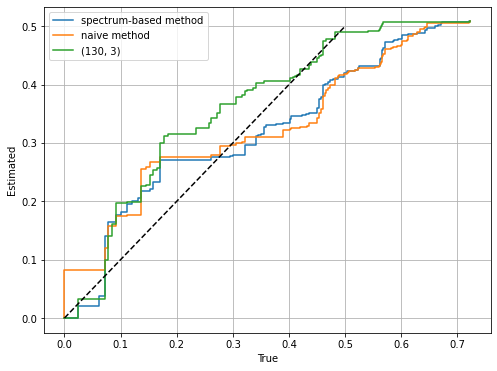

In [29]:
# plot estimated and true q-values
def combine_true_est(q_val_true,q_val_est):
    res = []
    q_idx = 0
    for q_e, _, score in q_val_est:
        while q_idx < len(q_val_true)-1 and q_val_true[q_idx+1][2] >= score:
            q_idx += 1
        res.append((score, q_val_true[q_idx][0], q_e))
    return res
        
scores_cond, trues_cond, estimateds_cond = zip(*combine_true_est(q_list_true, q_list_estimated_cond))
scores_rand, trues_rand, estimateds_rand = zip(*combine_true_est(q_list_true, q_list_estimated_rand))
to_plot = {'spectrum-based method':(trues_cond,estimateds_cond), 'naive method':(trues_rand,estimateds_rand)}
for k,v in q_list_knockoffs.items():
    to_plot[k] = list(zip(*combine_true_est(q_list_true, v)))[1], list(zip(*combine_true_est(q_list_true, v)))[2]

import plot_q_vals
plot_q_vals.plot_q_vals( to_plot )